In [ ]:
#without mpi


Sequential Hierarchical Clustering
Loaded 3500 samples with 16 features in 0.0180 seconds
Normalized Data (First 5 Rows):
 [[0.         0.         0.01974883 0.01224469 0.18619475 0.51729123
  0.         0.         0.61823529 0.92282385 0.9177326  0.72894865
  0.96596417 0.82178513 0.69727492 0.98061988]
 [0.0025883  0.02904251 0.         0.05268718 0.07832374 0.30149021
  0.0034263  0.00434717 0.71806921 0.87151366 0.73889739 0.87741555
  0.8819386  0.96511046 0.86017339 0.97497943]
 [0.00752058 0.01447464 0.03174268 0.02158254 0.19972386 0.53748365
  0.00730994 0.01256074 0.68890991 0.9321406  0.89209472 0.71214745
  0.94510489 0.7875125  0.6792857  0.98719586]
 [0.01231542 0.03728171 0.02588994 0.05169092 0.13913563 0.43724748
  0.01506223 0.02045932 0.71166021 0.76161425 0.78147601 0.78382619
  0.89100444 0.84494419 0.75666345 0.89367533]
 [0.01332325 0.01031    0.00341413 0.08718233 0.03882258 0.17937444
  0.01276053 0.02210899 0.66393246 0.94983186 0.9853686  0.93846444
  0.8148

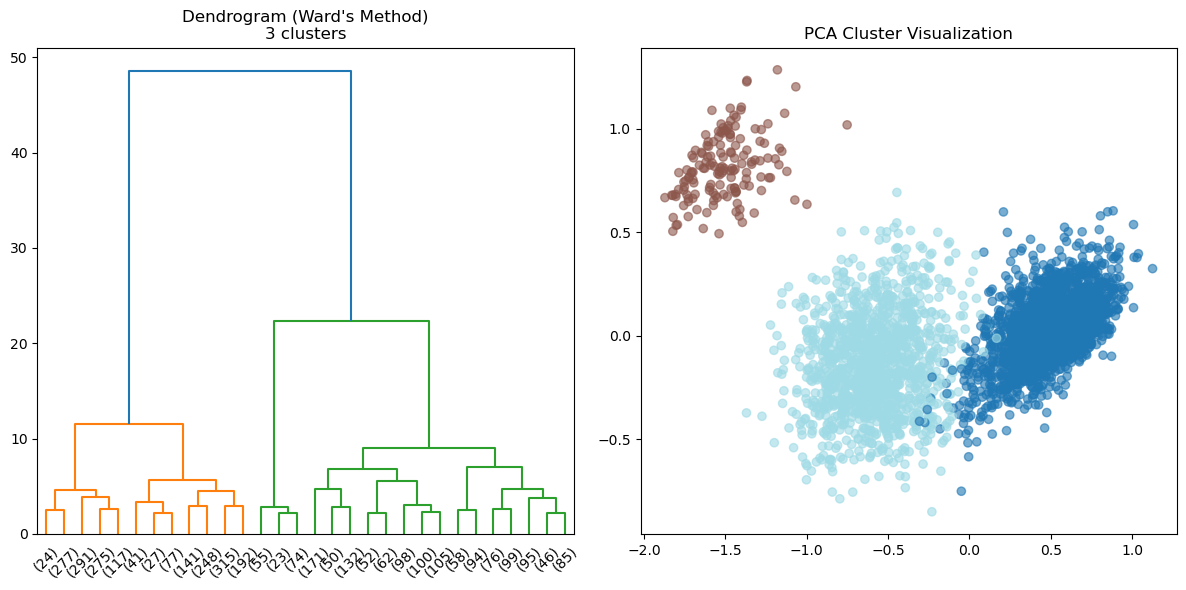

In [42]:
import zipfile
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform, cdist
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import time

def load_and_preprocess(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as z:
        csv_file = next(f for f in z.namelist() if f.endswith('.csv'))
        with z.open(csv_file) as f:
            df = pd.read_csv(f, nrows=3500)
            df = df.select_dtypes(include=[np.number]).iloc[:, :16]
    return df

def main():
    print("\nSequential Hierarchical Clustering\n" + "="*40)
    
    total_start = time.time()
    
    # 1. Load Dataset
    load_start = time.time()
    zip_path = r"C:\Users\katta\Desktop\mtech\2sem\dc\dry+bean+dataset (2).zip"
    df = load_and_preprocess(zip_path)
    load_time = time.time() - load_start
    print(f"Loaded {df.shape[0]} samples with {df.shape[1]} features in {load_time:.4f} seconds")
    
    # 2. Normalize with MinMaxScaler
    norm_start = time.time()
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(df)
    norm_time = time.time() - norm_start
    print("Normalized Data (First 5 Rows):\n", X_scaled[:5])
    print(f"Normalization completed in {norm_time:.4f} seconds")
    
    # 3. Distance Matrix
    dist_start = time.time()
    distance_matrix = squareform(pdist(X_scaled, metric='euclidean'))
    dist_time = time.time() - dist_start
    print(f"Distance Matrix computed in {dist_time:.4f} seconds")
    
    # 4. Hierarchical Clustering
    hc_start = time.time()
    Z = linkage(X_scaled, method='ward')
    hc_time = time.time() - hc_start
    print(f"Hierarchical clustering using Ward's method completed in {hc_time:.4f} seconds")
    
    # 5. Optimal clusters using Silhouette Score
    sil_start = time.time()
    cluster_range = range(3, 11)
    best_silhouette = -1
    best_k = None
    best_labels = None

    for k in cluster_range:
        labels = fcluster(Z, k, criterion='maxclust')
        sil_score = silhouette_score(X_scaled, labels)
        if sil_score > best_silhouette:
            best_silhouette = sil_score
            best_k = k
            best_labels = labels
    sil_time = time.time() - sil_start
    print(f"Silhouette analysis completed in {sil_time:.4f} seconds")
    
    # 6. Final Results
    print(f"\nUsing Ward's Method:")
    print(f"Optimal number of clusters: {best_k}")
    print(f"Silhouette score: {best_silhouette:.3f}")
    
    # 7. Cluster Sizes
    cluster_sizes = pd.Series(best_labels).value_counts().sort_index()
    print("\nCluster Sizes:")
    print(cluster_sizes)
    
    # 8. Linkage Matrix
    print("\nLinkage Matrix (First 5 Rows):")
    print(Z[:5])
    
    # 9. Final Cluster Centroids
    centroids = pd.DataFrame(X_scaled).groupby(best_labels).mean()
    print("\nFinal Cluster Centroids:")
    print(centroids)
    
    # 10. Cluster-to-Cluster Distance Matrix
    centroid_distances = cdist(centroids, centroids, metric='euclidean')
    print("\nCluster-to-Cluster Distance Matrix:")
    print(pd.DataFrame(centroid_distances))
    
    # 11. Visualization
    vis_start = time.time()
    plt.figure(figsize=(18, 6))
    
    # Dendrogram
    plt.subplot(131)
    dendrogram(Z, truncate_mode='lastp', p=30, show_leaf_counts=True)
    plt.title(f"Dendrogram (Ward's Method)\n{best_k} clusters")
    
    # PCA plot
    plt.subplot(132)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    plt.scatter(X_pca[:,0], X_pca[:,1], c=best_labels, cmap='tab20', alpha=0.6)
    plt.title('PCA Cluster Visualization')
    
    plt.tight_layout()
    plt.savefig('sequential_clustering_results.png')
    vis_time = time.time() - vis_start
    print(f"Visualization saved in {vis_time:.4f} seconds")
    
    # Total time
    total_time = time.time() - total_start
    print(f"\n{'='*40}")
    print(f"Total execution time: {total_time:.4f} seconds")
    print(f"{'='*40}")

if __name__ == "__main__":
    main()

In [ ]:
#with mpi


Optimized MPI Hierarchical Clustering with 1 processes
[Root] Loaded 3500 samples with 16 features in 0.0200 sec
[Root] Normalized in 0.0047 sec
[Root] Hierarchical clustering completed in 0.1951 sec

[Root] Best number of clusters: 3
[Root] Best silhouette score: 0.6006

[Root] Cluster sizes:
1    2025
2     152
3    1323
Name: count, dtype: int64

[Root] Cluster centroids:
         0         1         2         3         4         5         6   \
1  0.087290  0.122500  0.130304  0.140187  0.236941  0.571099  0.086236   
2  0.905314  0.882704  0.860273  0.830308  0.529802  0.824696  0.900165   
3  0.316177  0.456428  0.437881  0.315600  0.562704  0.838587  0.317204   

         7         8         9         10        11        12        13  \
1  0.133183  0.656218  0.942186  0.883534  0.669482  0.728795  0.613973   
2  0.930427  0.660799  0.909610  0.707495  0.353791  0.086330  0.073847   
3  0.411819  0.546422  0.843479  0.520952  0.330482  0.496021  0.217261   

         14        

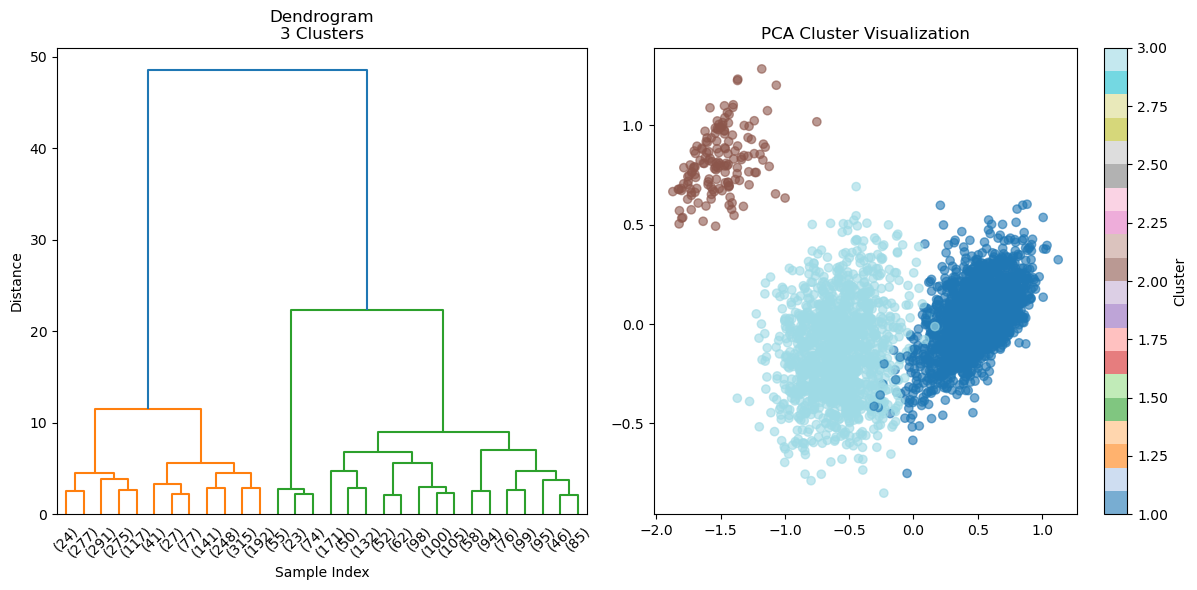

In [43]:
from mpi4py import MPI
import zipfile
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import time

def load_and_preprocess(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as z:
        csv_file = next(f for f in z.namelist() if f.endswith('.csv'))
        with z.open(csv_file) as f:
            df = pd.read_csv(f, nrows=3500)
            df = df.select_dtypes(include=[np.number]).iloc[:, :16]
    return df

def main():
    comm = MPI.COMM_WORLD
    rank = comm.Get_rank()
    size = comm.Get_size()
    total_start = time.time()

    # === Step 1: Root loads and normalizes data ===
    if rank == 0:
        print(f"\n{'='*40}\nOptimized MPI Hierarchical Clustering with {size} processes\n{'='*40}")
        zip_path = r"C:\Users\katta\Desktop\mtech\2sem\dc\dry+bean+dataset (2).zip"
        load_start = time.time()
        df = load_and_preprocess(zip_path)
        load_time = time.time() - load_start
        print(f"[Root] Loaded {df.shape[0]} samples with {df.shape[1]} features in {load_time:.4f} sec")

        norm_start = time.time()
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(df)
        norm_time = time.time() - norm_start
        print(f"[Root] Normalized in {norm_time:.4f} sec")
    else:
        X_scaled = None

    # === Step 2: Broadcast normalized data ===
    X_scaled = comm.bcast(X_scaled, root=0)

    # === Step 3: Root performs hierarchical clustering ===
    if rank == 0:
        hc_start = time.time()
        Z = linkage(X_scaled, method='ward')
        hc_time = time.time() - hc_start
        print(f"[Root] Hierarchical clustering completed in {hc_time:.4f} sec")
    else:
        Z = None

    # === Step 4: Broadcast linkage matrix to all ===
    Z = comm.bcast(Z, root=0)

    # === Step 5: Parallel silhouette score computation ===
    cluster_range = list(range(3, 11))
    local_range = np.array_split(cluster_range, size)[rank]

    local_best_score = -1
    local_best_k = None
    local_best_labels = None

    sil_start = time.time()
    for k in local_range:
        labels = fcluster(Z, k, criterion='maxclust')
        sil_score = silhouette_score(X_scaled, labels)
        if sil_score > local_best_score:
            local_best_score = sil_score
            local_best_k = k
            local_best_labels = labels
    sil_local_time = time.time() - sil_start

    # === Step 6: Gather best silhouette scores to root ===
    gathered = comm.gather((local_best_k, local_best_score, local_best_labels), root=0)

    # === Step 7: Root determines overall best ===
    if rank == 0:
        best_k, best_score, best_labels = max(gathered, key=lambda x: x[1])
        print(f"\n[Root] Best number of clusters: {best_k}")
        print(f"[Root] Best silhouette score: {best_score:.4f}")

        # Cluster sizes
        print(f"\n[Root] Cluster sizes:")
        print(pd.Series(best_labels).value_counts().sort_index())

        # Cluster centroids
        centroids = pd.DataFrame(X_scaled).groupby(best_labels).mean()
        print(f"\n[Root] Cluster centroids:")
        print(centroids)

        # Distance between cluster centroids
        centroid_dist = cdist(centroids, centroids)
        print(f"\n[Root] Cluster-to-cluster distance matrix:")
        print(pd.DataFrame(centroid_dist))

        # Visualization
        vis_start = time.time()
        plt.figure(figsize=(18, 6))

        plt.subplot(131)
        dendrogram(Z, truncate_mode='lastp', p=30, show_leaf_counts=True)
        plt.title(f"Dendrogram\n{best_k} Clusters")
        plt.xlabel("Sample Index")
        plt.ylabel("Distance")

        plt.subplot(132)
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_labels, cmap='tab20', alpha=0.6)
        plt.title("PCA Cluster Visualization")
        plt.colorbar(label='Cluster')

        plt.tight_layout()
        plt.savefig("clustering_results.png")
        vis_time = time.time() - vis_start
        print(f"[Root] Visualization saved in {vis_time:.4f} sec")

    # === Final timing ===
    comm.Barrier()
    total_time = time.time() - total_start
    if rank == 0:
        print(f"\n[Root] {'='*40}")
        print(f"[Root] Total execution time: {total_time:.4f} seconds")
        print(f"[Root] {'='*40}")

if __name__ == "__main__":
    main()


Speedup achieved: 1.05x


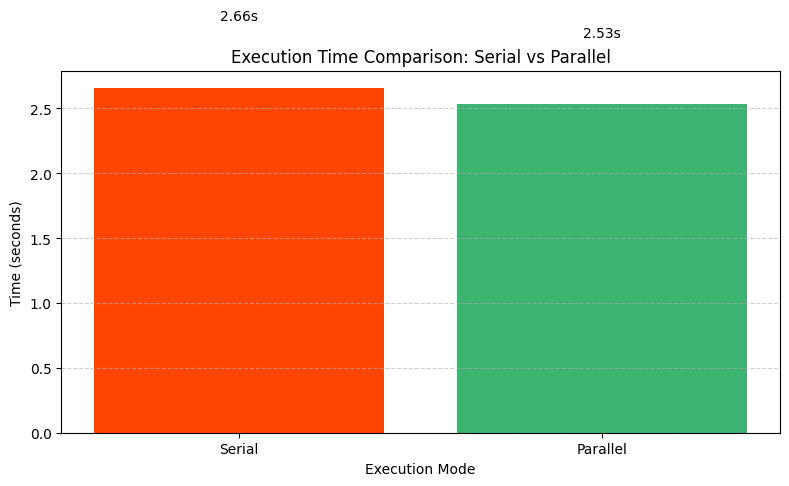

In [1]:
import matplotlib.pyplot as plt

# Actual times from your notebook
serial_time = 2.6577  # Replace with exact value if updated
parallel_time = 2.5299  # Replace with exact value if updated

# Calculate speedup
speedup = serial_time / parallel_time
print(f"Speedup achieved: {speedup:.2f}x")

# Plotting execution time comparison
execution_modes = ['Serial', 'Parallel']
execution_times = [serial_time, parallel_time]

plt.figure(figsize=(8, 5))
bars = plt.bar(execution_modes, execution_times, color=['orangered', 'mediumseagreen'])
plt.title('Execution Time Comparison: Serial vs Parallel')
plt.ylabel('Time (seconds)')
plt.xlabel('Execution Mode')

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}s', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
